# Deep Learning Modeling

### Tabnet install

In [19]:
#!pip install --upgrade tabnet

In [20]:
#! pip install git+https://github.com/titu1994/tf-TabNet.git

# Library import

In [21]:
# !pip install tensorboard
import pandas as pd
import numpy as np
import datetime, os

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics, datasets, utils
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import TensorBoard

from sklearn import model_selection

import matplotlib.pyplot as plt

from tabnet import TabNet, TabNetClassifier

## Multi-Layer Perceptrons

### 1. Data Loading & Preprocessing

In [22]:
df = pd.read_csv('preprocessing.csv')
del df['Unnamed: 0']
df.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Age,worked_year
0,0,0,0,0,202500.0,3,1,0,2,0,0,0,0,2,-6,1,38,13
1,0,0,1,1,247500.0,3,0,2,0,0,0,1,0,3,-5,1,31,4


### 2. Split data (Train X / Test X / Train X / Test Y)

In [23]:
df_target = df[['credit']].copy()
df_feature = df.drop(['credit'], axis=1).copy()

In [24]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df_feature, df_target, test_size=0.3, random_state=0)

In [25]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(18519, 17)
(7938, 17)
(18519, 1)
(7938, 1)


### 3. Change normal labels to one-hot labels

In [26]:
train_y = utils.to_categorical(train_y) # 0 or 1 -> one-hot vector
test_y = utils.to_categorical(test_y) # 0 or 1 -> one-hot vector

print(train_y.shape)
print(test_y.shape)

(18519, 3)
(7938, 3)


### 4. Build & Train the model

In [27]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

2 Layer

In [28]:
# Build up the "Sequence" of layers (Linear stack of layers)
model = models.Sequential() 

# Dense-layer (with he-initialization)
model.add(layers.Dense(input_dim=17, units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization()) # Batch normalization
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5)) # Dropout

model.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

# Model Compile
model.compile(optimizer=optimizers.Adam(),            # optimizer = Adam_optimizer
              loss=losses.categorical_crossentropy,   # loss = categorical_crossentropy
              metrics=[metrics.categorical_accuracy]) # metrics = categorical_accuracy

# Fit the model on training data
hist_model = model.fit(train_x, train_y, batch_size=100, epochs=20, validation_split=0.3) 

# Evaluate the model on test data

result = model.evaluate(test_x, test_y)
print('===================================')
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/20
130/130 [==============================] - 9s 61ms/step - loss: 1.1910 - categorical_accuracy: 0.5688 - val_loss: 0.9605 - val_categorical_accuracy: 0.6283
Epoch 2/20
130/130 [==============================] - 7s 55ms/step - loss: 0.9616 - categorical_accuracy: 0.6069 - val_loss: 0.9433 - val_categorical_accuracy: 0.6395
Epoch 3/20
130/130 [==============================] - 7s 51ms/step - loss: 0.9401 - categorical_accuracy: 0.6202 - val_loss: 0.9265 - val_categorical_accuracy: 0.6395
Epoch 4/20
130/130 [==============================] - 7s 57ms/step - loss: 0.9232 - categorical_accuracy: 0.6285 - val_loss: 0.9011 - val_categorical_accuracy: 0.6395
Epoch 5/20
130/130 [==============================] - 9s 68ms/step - loss: 0.9094 - categorical_accuracy: 0.6346 - val_loss: 0.9246 - val_categorical_accuracy: 0.6395
Epoch 6/20
130/130 [==============================] - 9s 72ms/step - loss: 0.9052 - categorical_accuracy: 0.6375 - val_loss: 0.9014 - val_categorical_accuracy: 0.639

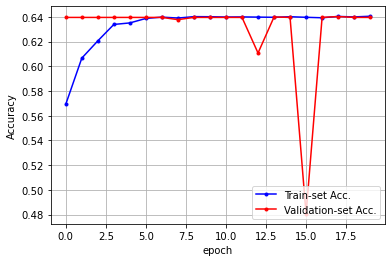

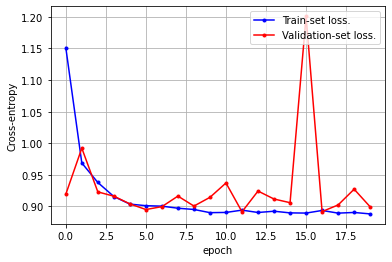

In [11]:
# Visualize

# Accuracy graph
acc = hist_model.history['categorical_accuracy']
val_acc = hist_model.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss graph
loss = hist_model.history['loss']
val_loss = hist_model.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

3 Layers

In [12]:
# Build up the "Sequence" of layers (Linear stack of layers)
model_2 = models.Sequential()

# Dense-layer (with he-initialization)
model_2.add(layers.Dense(input_dim=17, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model_2.add(layers.BatchNormalization()) # Batch normalization
model_2.add(layers.Activation('elu')) # elu

model_2.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_2.add(layers.Activation('elu')) 

model_2.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_2.add(layers.Activation('elu'))

model_2.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_2.add(layers.Activation('elu'))

model_2.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model_2.add(layers.Activation('elu')) 
model_2.add(layers.Dropout(rate=0.5)) # Dropout

model_2.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

# Model Compile
model_2.compile(optimizer=optimizers.Adam(),             # optimizer = Adam_optimizer
              loss=losses.categorical_crossentropy,      # loss = categorical_crossentropy
              metrics=[metrics.categorical_accuracy])    # metrics = categorical_accuracy

# Fit the model on training data
hist_model2 = model_2.fit(train_x, train_y, batch_size=100, epochs=20, validation_split=0.3)

# Evaluate the model on test data
result2 = model_2.evaluate(test_x, test_y)
print('===================================')
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/20
130/130 [==============================] - 4s 29ms/step - loss: 1.2623 - categorical_accuracy: 0.5597 - val_loss: 0.9619 - val_categorical_accuracy: 0.6406
Epoch 2/20
130/130 [==============================] - 4s 27ms/step - loss: 0.9742 - categorical_accuracy: 0.5979 - val_loss: 0.9072 - val_categorical_accuracy: 0.6395
Epoch 3/20
130/130 [==============================] - 4s 27ms/step - loss: 0.9371 - categorical_accuracy: 0.6235 - val_loss: 0.9104 - val_categorical_accuracy: 0.6395
Epoch 4/20
130/130 [==============================] - 4s 27ms/step - loss: 0.9188 - categorical_accuracy: 0.6312 - val_loss: 0.9228 - val_categorical_accuracy: 0.6395
Epoch 5/20
130/130 [==============================] - 4s 27ms/step - loss: 0.9119 - categorical_accuracy: 0.6359 - val_loss: 0.8985 - val_categorical_accuracy: 0.6395
Epoch 6/20
130/130 [==============================] - 4s 27ms/step - loss: 0.9010 - categorical_accuracy: 0.6393 - val_loss: 0.9329 - val_categorical_accuracy: 0.639

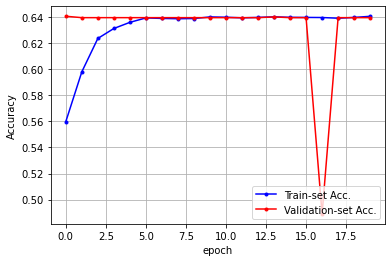

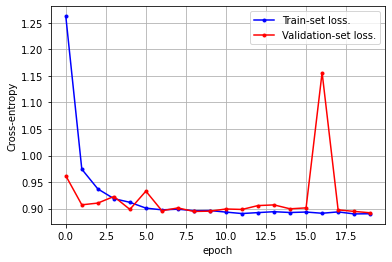

In [13]:
# Visualize

# Accuracy graph
acc = hist_model2.history['categorical_accuracy']
val_acc = hist_model2.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss graph
loss = hist_model2.history['loss']
val_loss = hist_model2.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

4 Layer

In [14]:
# Build up the "Sequence" of layers (Linear stack of layers)
model_3 = models.Sequential()

# Dense-layer (with he-initialization)
model_3.add(layers.Dense(input_dim=17, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model_3.add(layers.BatchNormalization()) # Batch normalization
model_3.add(layers.Activation('elu')) # elu

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu')) 
model_3.add(layers.Dropout(rate=0.5)) # Dropout

model_3.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

# Model Compile
model_3.compile(optimizer=optimizers.Adam(),             # optimizer = Adam_optimizer
              loss=losses.categorical_crossentropy,      # loss = categorical_crossentropy
              metrics=[metrics.categorical_accuracy])    # metrics = categorical_accuracy

# Fit the model on training data
hist_model3 = model_3.fit(train_x, train_y, batch_size=100, epochs=20, validation_split=0.3) 

# "Evaluate" the model on test data
result3 = model_3.evaluate(test_x, test_y)
print('===================================')
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/20
130/130 [==============================] - 5s 33ms/step - loss: 1.2769 - categorical_accuracy: 0.5489 - val_loss: 0.9123 - val_categorical_accuracy: 0.6395
Epoch 2/20
130/130 [==============================] - 5s 36ms/step - loss: 0.9757 - categorical_accuracy: 0.6020 - val_loss: 0.9058 - val_categorical_accuracy: 0.6395
Epoch 3/20
130/130 [==============================] - 4s 32ms/step - loss: 0.9362 - categorical_accuracy: 0.6252 - val_loss: 0.9133 - val_categorical_accuracy: 0.6395
Epoch 4/20
130/130 [==============================] - 5s 36ms/step - loss: 0.9233 - categorical_accuracy: 0.6312 - val_loss: 0.9405 - val_categorical_accuracy: 0.6395
Epoch 5/20
130/130 [==============================] - 4s 34ms/step - loss: 0.9126 - categorical_accuracy: 0.6356 - val_loss: 0.8975 - val_categorical_accuracy: 0.6395
Epoch 6/20
130/130 [==============================] - 4s 31ms/step - loss: 0.9044 - categorical_accuracy: 0.6379 - val_loss: 0.8950 - val_categorical_accuracy: 0.639

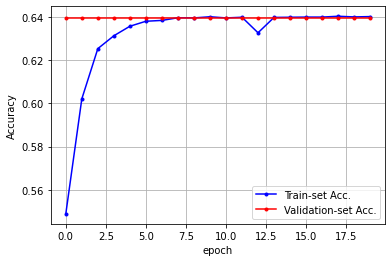

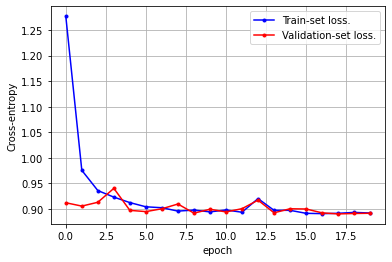

In [15]:
# Visualize

# accuracy graph
acc = hist_model3.history['categorical_accuracy']
val_acc = hist_model3.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# loss graph
loss = hist_model3.history['loss']
val_loss = hist_model3.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

In [16]:
# Build up the "Sequence" of layers (Linear stack of layers)
model_3 = models.Sequential()

# Dense-layer (with he-initialization)
model_3.add(layers.Dense(input_dim=17, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model_3.add(layers.BatchNormalization()) # Batch normalization
model_3.add(layers.Activation('elu')) # elu

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu'))

model_3.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model_3.add(layers.Activation('elu')) 
model_3.add(layers.Dropout(rate=0.5)) # Dropout

model_3.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

# Model Compile
model_3.compile(optimizer=optimizers.Adam(),             # optimizer = Adam_optimizer
              loss=losses.categorical_crossentropy,      # loss = categorical_crossentropy
              metrics=[metrics.categorical_accuracy])    # metrics = categorical_accuracy

# Fit the model on training data
hist_model3 = model_3.fit(train_x, train_y, batch_size=100, epochs=20, validation_split=0.3) 

# "Evaluate" the model on test data
result3 = model_3.evaluate(test_x, test_y)
print('===================================')
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/20
130/130 [==============================] - 5s 38ms/step - loss: 1.3238 - categorical_accuracy: 0.5523 - val_loss: 0.9185 - val_categorical_accuracy: 0.6395
Epoch 2/20
130/130 [==============================] - 5s 40ms/step - loss: 0.9801 - categorical_accuracy: 0.6024 - val_loss: 0.9461 - val_categorical_accuracy: 0.6235
Epoch 3/20
130/130 [==============================] - 4s 34ms/step - loss: 0.9344 - categorical_accuracy: 0.6199 - val_loss: 0.9010 - val_categorical_accuracy: 0.6395
Epoch 4/20
130/130 [==============================] - 4s 34ms/step - loss: 0.9205 - categorical_accuracy: 0.6279 - val_loss: 0.9013 - val_categorical_accuracy: 0.6395
Epoch 5/20
130/130 [==============================] - 5s 37ms/step - loss: 0.9059 - categorical_accuracy: 0.6379 - val_loss: 0.9258 - val_categorical_accuracy: 0.6395
Epoch 6/20
130/130 [==============================] - 5s 38ms/step - loss: 0.9037 - categorical_accuracy: 0.6371 - val_loss: 0.9100 - val_categorical_accuracy: 0.639

7 Layer

In [17]:
# Build up the "Sequence" of layers (Linear stack of layers)
model_4 = models.Sequential()

# Dense-layer (with he-initialization)
model_4.add(layers.Dense(input_dim=17, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model_4.add(layers.BatchNormalization()) # Batch normalization
model_4.add(layers.Activation('elu')) # elu

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu'))

model_4.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model_4.add(layers.Activation('elu')) 
model_4.add(layers.Dropout(rate=0.5)) # Dropout

model_4.add(layers.Dense(units=3, activation='softmax')) # Apply softmax function on model's output

# Model Compile
model_4.compile(optimizer=optimizers.Adam(),             # optimizer = Adam_optimizer
              loss=losses.categorical_crossentropy,      # loss = categorical_crossentropy
              metrics=[metrics.categorical_accuracy])    # metrics = categorical_accuracy

# Fit the model on training data
hist_model4 = model_4.fit(train_x, train_y, batch_size=100, epochs=20, validation_split=0.3)

# "Evaluate" the model on test data
result4 = model_4.evaluate(test_x, test_y)
print('===================================')
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

Epoch 1/20
130/130 [==============================] - 6s 45ms/step - loss: 1.4326 - categorical_accuracy: 0.5364 - val_loss: 0.9160 - val_categorical_accuracy: 0.6395
Epoch 2/20
130/130 [==============================] - 6s 45ms/step - loss: 0.9876 - categorical_accuracy: 0.5982 - val_loss: 0.9171 - val_categorical_accuracy: 0.6395
Epoch 3/20
130/130 [==============================] - 6s 44ms/step - loss: 0.9423 - categorical_accuracy: 0.6201 - val_loss: 0.8979 - val_categorical_accuracy: 0.6395
Epoch 4/20
130/130 [==============================] - 6s 43ms/step - loss: 0.9135 - categorical_accuracy: 0.6371 - val_loss: 0.9400 - val_categorical_accuracy: 0.6395
Epoch 5/20
130/130 [==============================] - 5s 42ms/step - loss: 0.9012 - categorical_accuracy: 0.6394 - val_loss: 0.9028 - val_categorical_accuracy: 0.6395
Epoch 6/20
130/130 [==============================] - 6s 44ms/step - loss: 0.8990 - categorical_accuracy: 0.6397 - val_loss: 0.8963 - val_categorical_accuracy: 0.639

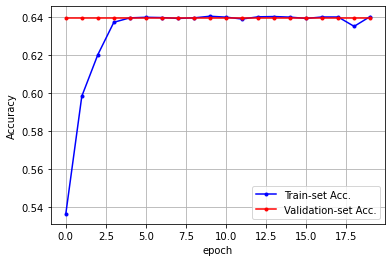

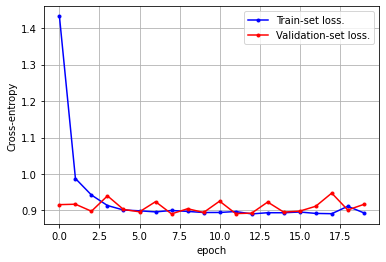

In [18]:
# Visualize
# accuracy graph
acc = hist_model4.history['categorical_accuracy']
val_acc = hist_model4.history['val_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

# loss graph
loss = hist_model4.history['loss']
val_loss = hist_model4.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()